# practise_chapter_18

## persistence

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.metrics import mean_squared_error

In [25]:
from datetime import datetime


def parser(x):
    return datetime.strptime("190" + x, "%Y-%m")


# parser()

ds = pd.read_csv(
    "../data/shampoo-sales.csv",
    header=0,
    index_col=0,
).squeeze()

ds.index = ds.index.map(parser)
ds.head()

Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales, dtype: float64

In [28]:
values = pd.DataFrame(ds.values)
values.head()

,0
0,266.0
1,145.9
2,183.1
3,119.3
4,180.3


In [31]:
df = pd.concat([values.shift(1), values], axis=1)
df.head()

,0,0
0,NaN,266.0
1,266.0,145.9
2,145.9,183.1
3,183.1,119.3
4,119.3,180.3


In [32]:
df.columns = ["t", "t+1"]
df.head()

,t,t+1
0,NaN,266.0
1,266.0,145.9
2,145.9,183.1
3,183.1,119.3
4,119.3,180.3


In [35]:
X = df.values
train_size = int(len(X) * 0.66)
train_size

23

In [36]:
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:, 0], train[:, 1]
test_X, test_y = test[:, 0], test[:, 1]

In [37]:
def model_persistence(x):
    return x

Test RMSE: 133.156


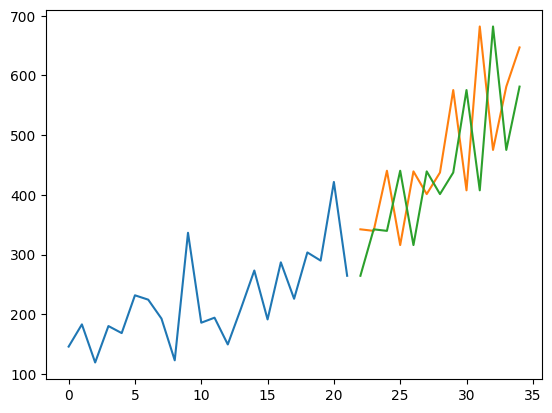

In [41]:
# walk-forward validation
predictions = list()
for x in test_X:
    yhat = model_persistence(x)
    predictions.append(yhat)
rmse = math.sqrt(mean_squared_error(test_y, predictions))
print("Test RMSE: %.3f" % rmse)
# plot predictions and expected results
plt.plot(train_y)
plt.plot([None for i in train_y] + [x for x in test_y])
plt.plot([None for i in train_y] + [x for x in predictions])
plt.show()